### Libraries

In [44]:
from mobfot import MobFot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch


In [45]:
client = MobFot()

### League id

In [46]:
leagues = pd.DataFrame({"League Name": ["Premier League", "Serie A", "Bundesliga", "Ligue 1", "LaLiga", "Süper Lig"],
                        "League Id": [47, 55, 54, 53, 87, 71]})

In [47]:
leagues

,League Name,League Id
0,Premier League,47
1,Serie A,55
2,Bundesliga,54
3,Ligue 1,53
4,LaLiga,87
5,Süper Lig,71


### League Select

In [48]:
league_name = "Süper Lig"

In [49]:
if league_name in leagues["League Name"].values:
    league_id = leagues.loc[leagues["League Name"] == league_name, "League Id"].values[0]
else:
    print("Wrong team name!")

In [50]:
league = client.get_league(league_id)

### her takım

In [51]:
# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

In [52]:
# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"team_name": league["table"][0]["data"]["table"]["all"][i]["name"], "team_id": league["table"][0]["data"]["table"]["all"][i]["id"]}
    
    # Append the new row to the DataFrame
    league_df = pd.concat([league_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(league_df)

           team_name team_id
0         Fenerbahçe    8695
1        Galatasaray    8637
2    Adana Demirspor    1926
3           Beşiktaş   10188
4        Trabzonspor    9752
5          Kasımpaşa    4685
6          Hatayspor   95749
7           Rizespor    2166
8        Kayserispor   10182
9          Sivasspor    6265
10        Alanyaspor    4678
11        Ankaragücü    9742
12  Fatih Karagümrük    2088
13       Antalyaspor    1931
14         Konyaspor    8622
15         Gaziantep    4081
16        Başakşehir    1933
17        Pendikspor   95745
18      Istanbulspor  106560
19        Samsunspor    9750


### Select Team

In [53]:
team_name = "Fenerbahçe"

In [54]:
if team_name in league_df["team_name"].values:
    team_id = league_df.loc[league_df["team_name"] == team_name, "team_id"].values[0]
else:
    print("Wrong team name!")

In [55]:
team = client.get_team(team_id)

In [56]:
keepers = team["squad"][1][1]
defenders = team["squad"][2][1]
midfielders = team["squad"][3][1]
attackers = team["squad"][4][1]

In [57]:
players = keepers + defenders + midfielders + attackers

### players

In [58]:
# Create an empty DataFrame with column names
player_df = pd.DataFrame(columns=["player_name", "player_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(players)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"player_name": players[i]["name"], "player_id": players[i]["id"]}
    
    # Append the new row to the DataFrame
    player_df = pd.concat([player_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(player_df)

            player_name player_id
0     Dominik Livakovic    383971
1       Irfan Egribayat    707777
2          Furkan Akyuz   1368027
3        Muhammet Demir   1535420
4           Serdar Aziz    150134
5       Alexander Djiku    407765
6         Samet Akaydin    424380
7   Bright Osayi-Samuel    618718
8               Lincoln    637589
9            Luan Peres    763386
10       Ferdi Kadioglu    774448
11        Rodrigo Becao    844504
12          Mert Müldür    904098
13   Jayden Oosterwolde   1174351
14    Ahmet Necat Aydin   1460972
15                 Fred    322049
16            Miha Zajc    396949
17         Cengiz Ünder    603477
18             Emre Mor    683333
19  Sebastian Szymanski    765466
20    Mert Hakan Yandas    796006
21        Miguel Crespo    850288
22        Ismail Yüksek   1183589
23         Bartug Elmaz   1216728
24       Yusuf Kocatürk   1362125
25      Efekan Karayazi   1522333
26           Edin Dzeko     15403
27          Dusan Tadic     94267
28          Jo

### Select Player

In [59]:
playername = "Sebastian Szymanski"

In [60]:
if playername in player_df["player_name"].values:
    player_id = player_df.loc[player_df["player_name"] == playername, "player_id"].values[0]
else:
    print("Wrong player name!")

In [61]:
player = client.get_player(player_id)

In [62]:
player_name = player["name"]

In [63]:
player.keys()

dict_keys(['id', 'name', 'origin', 'playerProps', 'injuryInformation', 'lastLeague', 'recentMatches', 'careerStatistics', 'careerHistory', 'QAData', 'isCoach', 'meta'])

In [64]:
player_min_played = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][3][1]["value"]
player_goals = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][5][1]["value"]
player_xgoals = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][6][1]["value"]
player_assists = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][12][1]["value"]
player_keypasses = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][13][1]["value"]

### Matches

In [65]:
matches = list(player["recentMatches"].values())[0]
last_one = matches[0]

In [66]:
# Create an empty DataFrame with column names
matches_df = pd.DataFrame(columns=[])

# Define the number of rows you want in the DataFrame
num_rows = len(matches)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    if int(matches[i]["date"]["utcTime"][0:10][5:7]) > 6:
        # Create a new row as a dictionary
        new_row = {"opponent_name": matches[i]["versus"]["opponentName"], 
                   "opponent_id": matches[i]["versus"]["opponentId"], 
                   "match_id": matches[i]["versus"]["matchId"]}
        
        # Append the new row to the DataFrame
        matches_df = pd.concat([matches_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
# print(matches_df)


# Define a dictionary to map old values to new values
value_mapping = {"Brighton": "Brighton & Hove Albion", 
                 "West Ham": "West Ham United", 
                 "Tottenham": "Tottenham Hotspur",
                 "Wolverhampton": "Wolverhampton Wanderers"}

# Use the .replace() method to replace values
matches_df["opponent_name"] = matches_df["opponent_name"].replace(value_mapping)
# Print the resulting DataFrame
print(matches_df)

         opponent_name  opponent_id  match_id
0   Ludogorets Razgrad       210173   4315321
1            Hatayspor        95749   4257153
2              Moldova         5794   4044733
3        Faroe Islands         8269   4044731
4            Kasımpaşa         4685   4257174
5       Spartak Trnava         4662   4315328
6             Rizespor         2166   4257169
7           Başakşehir         1933   4257125
8           Alanyaspor         4678   4257141
9         Nordsjælland        10202   4315290
10         Antalyaspor         1931   4257117
11             Albania        10024   4044729
12       Faroe Islands         8269   4044726
13          Ankaragücü         9742   4257108
14           FC Twente         8611   4287967


### All league games

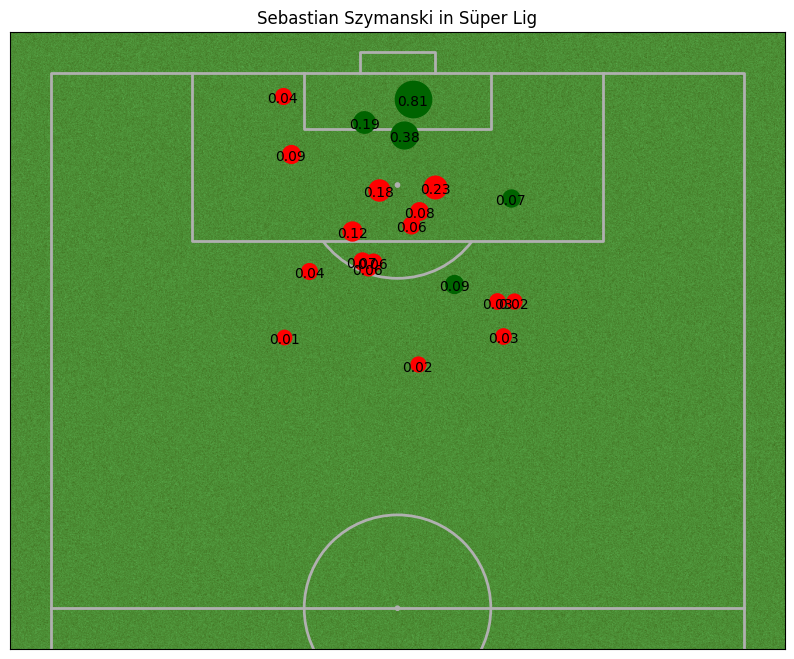

In [67]:
i=0
fig = plt.figure(figsize = (10,10), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color="grass",
    goal_type="box"
)
pitch.draw(ax = ax)

for i in range(len(matches_df)):
    opponent_name = matches_df.loc[i]["opponent_name"]
    if opponent_name in league_df["team_name"].to_list():
        opponent_id = matches_df.loc[i]["opponent_id"]
        match_id = matches_df.loc[i]["match_id"]
        get_match =  client.get_match_details(match_id)
        get_match1 = list(get_match.values())
        match_events = list(get_match1[5].values())
        match_shots = match_events[4]["shots"]
        length = len(match_shots)
        y=0
        for y in range(length):
            ax.set_title(playername + " in " + league_name)
            if match_shots[y]["playerName"] == playername and match_shots[y]["eventType"] == "Goal":
                colors = "darkgreen"
                ax.scatter(match_shots[y]["y"],match_shots[y]["x"], s = (round(match_shots[y]["expectedGoals"], 2)*720) + 100, c=colors)
                ax.annotate(round(match_shots[y]["expectedGoals"], 2), (match_shots[y]["y"],match_shots[y]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
            if match_shots[y]["playerName"] == playername and match_shots[y]["eventType"] != "Goal":
                colors = "red"
                ax.scatter(match_shots[y]["y"],match_shots[y]["x"], s = (round(match_shots[y]["expectedGoals"], 2)*720) + 100, c=colors)
                ax.annotate(round(match_shots[y]["expectedGoals"], 2), (match_shots[y]["y"],match_shots[y]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")

#### Save Fig

In [68]:
# fig=plt.figure(figsize=(15, 10.38), dpi=100, facecolor='#3E3E40')
# fig = plt.figure(figsize = (8,8), dpi = 100)
# ax = plt.subplot(111)

# colors = "red"

# # Notice the extra parameters passed to the object
# pitch = VerticalPitch(
#     pitch_type = "uefa",
#     half = True,
#     axis = True, 
#     label = False, 
#     tick = False,
#     pitch_color="grass",
#     goal_type="box"
# )
# pitch.draw(ax = ax)
# plt.savefig('plotly_add_pitch.png', format='png', bbox_inches='tight', pad_inches=0)

#### Opponent Selection

In [69]:
versus = "Hatayspor"

In [70]:
if versus in matches_df["opponent_name"].values:    
    opponent_name = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_name"].values[0]
    opponent_id = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_id"].values[0]
    match_id = matches_df.loc[matches_df["opponent_name"] == versus, "match_id"].values[0]
else:
    print("Wrong team name!")

In [71]:
match_details = client.get_match_details(match_id)

In [72]:
last_match =  client.get_match_details(matches_df.loc[0]["match_id"])
get_match =  client.get_match_details(match_id)

In [73]:
get_match1 = list(get_match.values())
match_events = list(get_match1[5].values())

In [74]:
match_shots = match_events[4]["shots"]

In [75]:
match_shots[1]["y"],match_shots[1]["x"]

(28.959285713000003, 97.8596491223)

### Visualization

#### ShotMap for one game

In [76]:
length = len(match_shots)

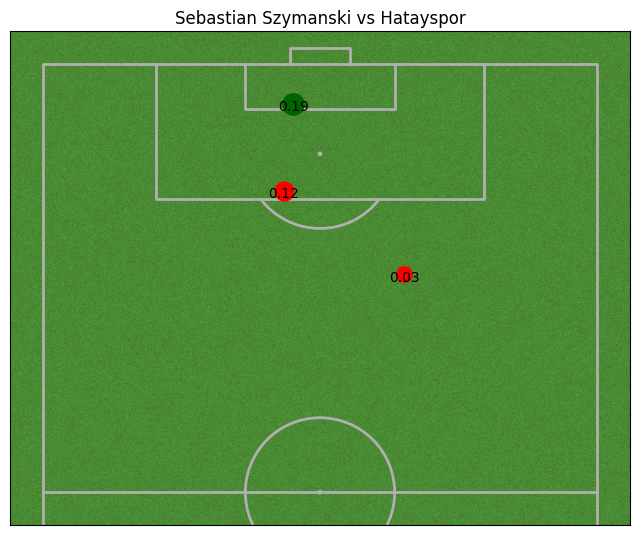

In [77]:
fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color="grass",
    goal_type="box"
)

pitch.draw(ax = ax)
i=0
# Hypothetical shot.
for i in range(length):
    if match_shots[i]["playerName"] == playername:
        ax.set_title(playername + " vs " + opponent_name)
    if match_shots[i]["playerName"] == playername and match_shots[i]["eventType"] == "Goal":
        colors = "darkgreen"
        ax.scatter(match_shots[i]["y"],match_shots[i]["x"], s = (round(match_shots[i]["expectedGoals"], 2)*720) + 100, c=colors)
        ax.annotate(round(match_shots[i]["expectedGoals"], 2), (match_shots[i]["y"],match_shots[i]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
    if match_shots[i]["playerName"] == playername and match_shots[i]["eventType"] != "Goal":
        colors = "red"
        ax.scatter(match_shots[i]["y"],match_shots[i]["x"], s = (round(match_shots[i]["expectedGoals"], 2)*720) + 100, c=colors)
        ax.annotate(round(match_shots[i]["expectedGoals"], 2), (match_shots[i]["y"],match_shots[i]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
